# Titanic Dataset Predictive Analysis .


In [15]:
import pandas as pd
import numpy as np
from matplotlib import cm as cm
import seaborn as sns
import matplotlib.pyplot as plt

**Note that we only import train.csv data because the test.csv data has no target values. The test data will be created from a proportion of the train.csv data.**

In [84]:
train = pd.read_csv('train.csv')
print('Training data shape:', train.shape)
train.head()

Training data shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
print('Data type and number of observations in training set:')
print()
print(train.info())

Data type and number of observations in training set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [86]:
print('Number of missing values in training data:')
print()
print(train.isna().sum())
train.describe()

Number of missing values in training data:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Here, we determine if training data set is balanced:**

In [87]:
print(train['Survived'].value_counts())
print()
print('Baseline prediction accuracy:', np.around(train['Survived'].value_counts()[0]/len(train)*100,2),'%')

0    549
1    342
Name: Survived, dtype: int64

Baseline prediction accuracy: 61.62 %


### 1.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. What do you conclude?

**Section 1.2**

**Answers:** 

To analyze the data set further and see which factors might have significant impact on survivability, it is necessary to pre-process the data. Here, we drop columns we deem as redundant or with many missing values (i.e. Ticket, Cabin, PassengerId). 

Also, our hypothesis is that the 'Sex' of the passenger, as well as 'Pclass are good indicators of survivability. We will investigate this hypothesis further.

In [95]:
train = pd.read_csv('train.csv')
print('Training data shape:', train.shape)
train.head()

Training data shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train.drop(['Ticket','Cabin','PassengerId'], axis = 1, inplace = True)
pd.DataFrame(train.groupby('Sex').mean()['Survived'])

,Survived
Sex,
female,0.742038
male,0.188908


In [97]:
pd.DataFrame(train.groupby('Pclass').mean()['Survived'])

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**Answers:** 

Indeed, female passengers had a high survival rate of about 74.2% compared to male passengers who had a survivability of about 18.9%. 

Moreover, the class of the passenger plays a major role in determining survivability. Here, we see that passengers with in Pclass = 1 has a 63.0% chance of survival, while those from Pclass = 3 has only a 24.2% of survival.

Next, we convert 'Sex' into a binary variable.

In [98]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

**The training and test sets now look like:**

In [99]:
print('Shape of training set:', train.shape)
print('Number of missing observations in training set:')
print()
print(train.isna().sum())
train.head()

Shape of training set: (891, 9)
Number of missing observations in training set:

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


**Here we look at the correlation between all independent variables:**

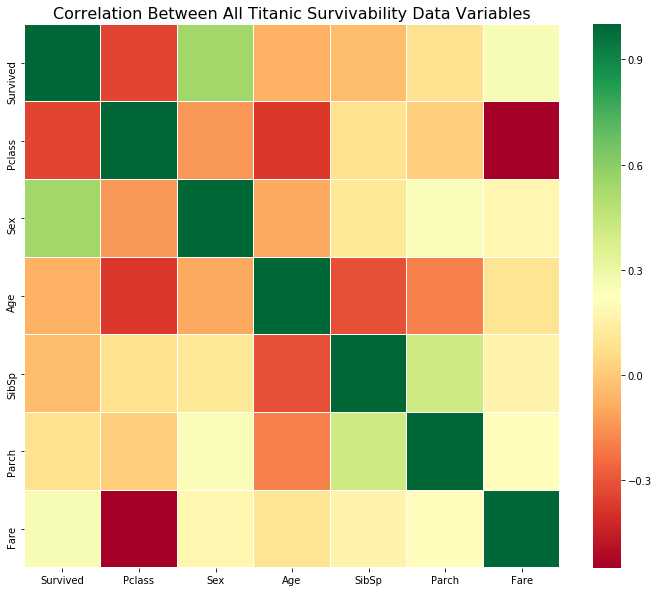

In [100]:
plt.figure(figsize = (12,10))
ax = plt.axes()
corr_matrix = train.corr()
sns.heatmap(corr_matrix, ax = ax, cmap = "RdYlGn", linewidths = 0.05)
ax.set_title('Correlation Between All Titanic Survivability Data Variables', fontsize = 16)
plt.show()

**Section 1 Overall Conclusion**

**Answers:**

Within this exploratory phase, we have shown the data type of each variable in the data sets, as well as removed variables (e.g. 'Ticket','Cabin','Pclass') which we deem as redundant. We have also noted the number of missing observations for each variable. In addition, the 'Sex' variable is also converted to a binary variable (0,1). 

Overall, in investigating the importance of factors in determining survivability, we have noted that the variables 'Pclass' and 'Sex' are some factors which _might_ be good indicators of survival. This hypothesis is further substantiated by the relatively higher correlation _magnitude_ (more red and more green colours above) between these factors and 'Survived'.

Looking at the independent variable types and values, and taking into account the fact that we will be using decision trees and logistic regression for predictions, we do not see any immediate need to normalize the independent variables. If, however, we decide to implement other algorithms such as K-nearest neighbors, there will be a need to do so. 

Lastly, we have plotted a correlation table for all of the independent variables. Among the potential predictor variables, all of them are minimally correlated with each other except for 'Pclass' and 'Fare'. This is expected as a better class would likely demand a higher ticket fare. The fact that most of the predictor variables are _not_ highly correlated is great for our machine learning model.  

## Part 2: Decision Trees
### 2.1 Decision Tree
Using the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn, fit a model to predict titanic survival. Make sure you come up with an appropriate way of handling each of the input variables before feeding them in to the decision tree. You can use the [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) method to implement 10-fold cross-validation.

For this any the following problems, you should set aside some of your training data as held-out test data, prior to cross-validation. Report the average training and testing accuracy across your 10 folds, and show a diagram of the tree (at least the first three levels). Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated accuracy?


### Section 2.1.1 - Preprocessing Data

**Answers:**

Before we feed the independent variables into the decision tree, we will need to process the data further. Here, we map 'Embarked' to dummy binary columns, and bucket 'Age','Fare','SibSp' and 'Parch'. 

Also, for this particular segment, we will simply impute missing 'Embarked' observations (2 missing observations) with the mode of the 'Embarked column. Moreover, rows with NaN values in the 'AgeBand' will also simply be dropped to simplify the approach. The predictive performance of this approach will then be compared against what is obtained when we impute missing data appropriately (later in the notebook).

In [101]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].dropna().mode()[0])

In [105]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [106]:
binary_encoded = pd.get_dummies(train.Embarked)
newcols = binary_encoded.columns
train[newcols] = binary_encoded
    
train = train.drop(['Embarked'], axis = 1)

In [108]:
train['FareBand']=pd.qcut(train['Fare'],4,labels=np.arange(4)).astype(int)

qtrain = train.copy() #save dataframe for later parts

train['AgeBand']=pd.qcut(train['Age'],5,labels=np.arange(5)).astype(int)
train = train.drop(['Age','Fare'], axis = 1)
train.loc[train['AgeBand'] < 0, 'AgeBand'] = np.nan # set missing AgeBand values to NaN

In [111]:
train.loc[train['SibSp'] >= 2, 'SibSp'] = 2 
train.loc[train['Parch'] >= 2, 'Parch'] = 2 

**The training set now looks like:**

In [115]:
print('Shape of train set:', train.shape)
train.head()

Shape of train set: (891, 11)


,Survived,Pclass,Name,Sex,SibSp,Parch,C,Q,S,FareBand,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,0,0,0,1,0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,1,0,0,3,3.0
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,0,1,1,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,0,0,1,3,3.0
4,0,3,"Allen, Mr. William Henry",0,0,0,0,0,1,1,3.0


### Section 2.1.2 - 10-fold cross validation with Decision Trees

In [116]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold

**Here, we simply drop the rows with nan values, and the entire 'Name' column. Later, we will perform data imputation and feature engineering before comparing predictive performances.**

In [117]:
ptrain = train.copy()

In [118]:
nan_rows = ptrain[ptrain['AgeBand'].isna()].index
ptrain = ptrain.drop(nan_rows)
ptrain.reset_index(drop = True, inplace = True)

In [121]:
X = ptrain.drop(['Survived','Name'], axis = 1)
y = ptrain['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 99)
print('Shape of training set:', X_train.shape, y_train.shape)
print('Shape of test set:', X_test.shape, y_test.shape)

Shape of training set: (571, 9) (571,)
Shape of test set: (143, 9) (143,)


In [122]:
max_depth = [None,1,2,3,4]
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3,4]
K = 10

kf = KFold(n_splits = K)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
best_score = 0
val_list = []
train_list = []

for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            print('Training for max_depth:', depth, ', min_samples_split:',\
                  split, ', min_samples_leaf:', leaf)
            clf = DecisionTreeClassifier(random_state = 0, max_depth = depth,\
                                            min_samples_split = split,\
                                            min_samples_leaf = leaf)
            
            for train_index, test_index in kf.split(X_train):
                X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                clf.fit(X, y)
                train_list.append(clf.score(X,y))
                val_list.append(clf.score(X_val,y_val))
                
            train_score = np.mean(train_list)
            val_score = np.mean(val_list)
            
        
            print('10-fold CV training score:', train_score)
            print('10-fold CV test score:', val_score)
            print()
            
            if val_score > best_score:
                opt_depth = depth
                opt_split = split
                opt_leaf = leaf
                best_score = val_score

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 1
10-fold CV training score: 0.9073740338741363
10-fold CV test score: 0.8020568663036902

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 2
10-fold CV training score: 0.8940450997792795
10-fold CV test score: 0.8055958862673928

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 3
10-fold CV training score: 0.8872666064931748
10-fold CV test score: 0.813198225448679

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 4
10-fold CV training score: 0.8805211390993698
10-fold CV test score: 0.8130671506352087

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 1
10-fold CV training score: 0.8848409068499179
10-fold CV test score: 0.8112159709618875

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.8841534499890019
10-fold CV test score: 0.8108691268400889

Training for max_depth:

10-fold CV training score: 0.8241490500349693
10-fold CV test score: 0.8022189501078656

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.8243029552713187
10-fold CV test score: 0.8024456095538975

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 3
10-fold CV training score: 0.824451263953619
10-fold CV test score: 0.8026640268382556

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 4
10-fold CV training score: 0.824590801744959
10-fold CV test score: 0.802843315184513

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 1
10-fold CV training score: 0.8247390962825103
10-fold CV test score: 0.8030163127116036

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 2
10-fold CV training score: 0.8248722141534642
10-fold CV test score: 0.8032135928406033

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 3
10-fold CV training score: 0.82500081955421

In [123]:
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal max_depth: None
Optimal min_samples_split: 4
Optimal min_samples_leaf: 3
Best 10-fold CV test score: 0.8035591853196209


In [125]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = opt_depth,\
                        min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf) 
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)

Train score: 0.8756567425569177
Held-out test score: 0.7272727272727273


In [293]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

tree.export_graphviz(clf, out_file='tree.dot')  
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
print(graph)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

**Section 2.1**

**Answers:**

To determine the optimal parameters for the decision tree, we compared the 10-fold validation scores of trees grown using different parameters: max_depth = [None,1,2,3,4], min_samples_split = [2,3,4], and min_samples_leaf = [1,2,3,4]. The optimal set of parameters was determined to be: max_depth = None, min_samples_split = 4, min_samples_leaf = 3, which gave a 10-fold validation score of about 80.4%. 

Training a new decision tree on the entire training set using these parameter values, we obtained a training score of about 87.6% and a held-out test score of about 72.7%. 

### 2.2 Tree tuning

Use all of the data (minus the held-out data) to re-fit a single decision tree with max_depth = 4 (i.e., no cross-validation). Show the tree diagram and also plot the feature importances. What do you observe?

Train score: 0.8353765323992994
Held-out test score: 0.7272727272727273


Text(0,0.5,'Gini Importance')

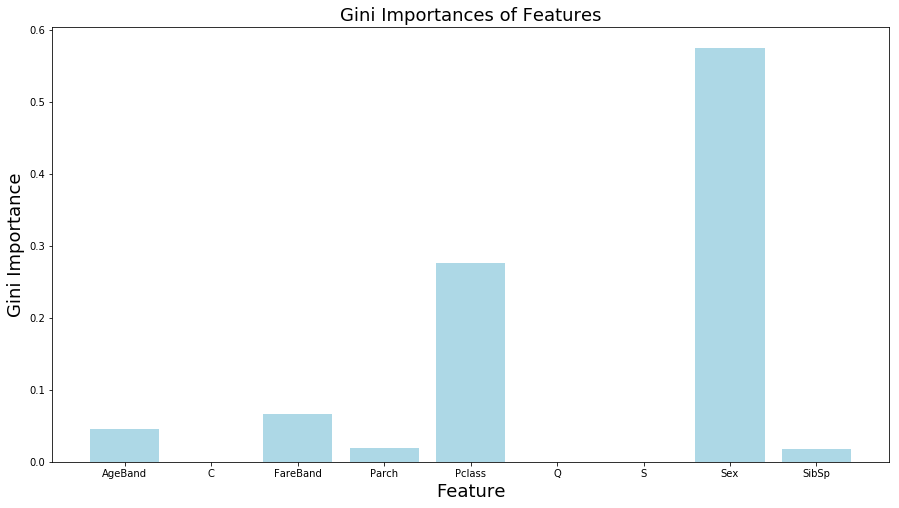

In [127]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = 4, min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf)
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)
gini_importance = pd.DataFrame(clf.feature_importances_, index = X_train.columns, columns = ['Gini importance'])

plt.figure(figsize = (15,8))
plt.bar(gini_importance.index, gini_importance['Gini importance'], color = 'lightblue')
plt.title('Gini Importances of Features', fontsize = 18)
plt.xlabel('Feature', fontsize = 18)
plt.ylabel('Gini Importance', fontsize = 18)

**Section 2.2**

**Answers:**

A single decision tree with max_depth = 4 was trained using all training data available, giving a train score of about 83.5% and a held-out test score of about 72.7%. By changing the max_depth from 'None' to '4', we have limited the decision tree's tendency to overfit, and have obtained a lower train score. While we expected to see a slight improvement in held-out test score, it remained roughly the same.

Moreover, looking at the Gini importances of all features, it appears that the two variables 'Sex' and 'Pclass' are the most important indicators of survivability. Other less significant factors include 'SibSp', the newly created 'AgeBand' and 'Fareband' variables. Also, we note that the 'Embarked' variable has almost no impact on survivability. 

### 2.3 Sensitivity analysis
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of these parameters affects performance.

First, show how max_depth affects train and test accuracy. On a single axis, plot train and test accuracy as a function of max_depth. Use a red line to show test accuracy and a blue line to show train accuracy. Do not use your held-out test data.

Second, show how test accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest accuracy? How sensitive are the results to these two parameters?

In [128]:
max_depth = [1,2,3,4,5,6,7,8,9,10,None]
K = 10

kf = KFold(n_splits = K)
train_score = []
val_score = []

for depth in max_depth:
    print('Training for max_depth:', depth)
    clf = DecisionTreeClassifier(random_state = 0, max_depth = depth)
    for train_index, test_index in kf.split(X_train):
        X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
        y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
        clf.fit(X, y)
        train_list.append(clf.score(X,y))
        val_list.append(clf.score(X_val,y_val))

    train_score.append(np.mean(train_list))
    val_score.append(np.mean(val_list))


    print('10-fold CV training score:', np.mean(train_list))
    print('10-fold CV test score:', np.mean(val_list))
    print()

Training for max_depth: 1
10-fold CV training score: 0.8244286740822061
10-fold CV test score: 0.8032172007180188

Training for max_depth: 2
10-fold CV training score: 0.8242380607041081
10-fold CV test score: 0.8033702164198036

Training for max_depth: 3
10-fold CV training score: 0.8241430544704944
10-fold CV test score: 0.8032399005175774

Training for max_depth: 4
10-fold CV training score: 0.8242821253441646
10-fold CV test score: 0.8033877797943132

Training for max_depth: 5
10-fold CV training score: 0.8245965215676458
10-fold CV test score: 0.8037200428126018

Training for max_depth: 6
10-fold CV training score: 0.8251313623182011
10-fold CV test score: 0.8036700947771727

Training for max_depth: 7
10-fold CV training score: 0.8258651505482576
10-fold CV test score: 0.8035430831324322

Training for max_depth: 8
10-fold CV training score: 0.8267633651408092
10-fold CV test score: 0.8034189174762463

Training for max_depth: 9
10-fold CV training score: 0.82777654111029
10-fold CV

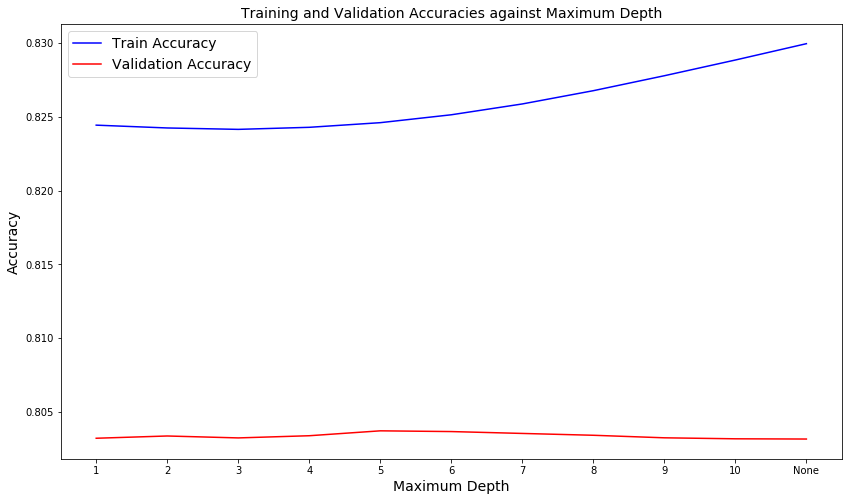

In [129]:
fig, ax = plt.subplots(figsize = (14,8))
plt.plot(train_score, color = 'blue')
plt.plot(val_score, color = 'red')

x = [i for i in range(len(max_depth))]
plt.xticks(x, max_depth)
ax.set_xlabel('Maximum Depth', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)
ax.set_title('Training and Validation Accuracies against Maximum Depth', fontsize = 14)
ax.legend(['Train Accuracy', 'Validation Accuracy'], fontsize = 14)

In [130]:
max_depth = list(range(1,21))
min_samples_leaf = list(range(1,21))
K = 10

kf = KFold(n_splits = K)
train_score = []
val_score = []

for depth in max_depth:
    for leaf in min_samples_leaf:
        #print('Training for max_depth:', depth, ', min_samples_leaf:', leaf)
        clf = DecisionTreeClassifier(random_state = 0, max_depth = depth, min_samples_leaf = leaf)
        for train_index, test_index in kf.split(X_train):
            X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
            y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
            clf.fit(X, y)
            train_list.append(clf.score(X,y))
            val_list.append(clf.score(X_val,y_val))

        train_score.append(np.mean(train_list))
        val_score.append(np.mean(val_list))

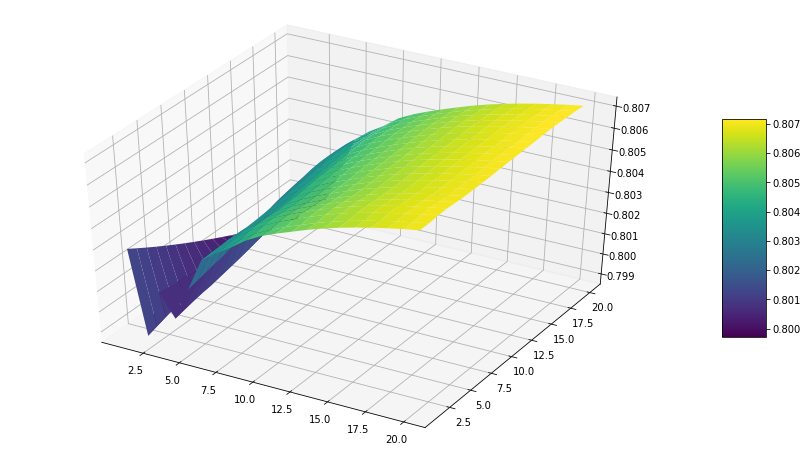

In [135]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Z = np.asarray(val_score).reshape(len(max_depth),len(min_samples_leaf))
X = np.asarray((max_depth * 20)).reshape(len(min_samples_leaf),len(max_depth))
Y = np.asarray((min_samples_leaf * 20)).reshape(len(min_samples_leaf),len(max_depth)).T

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z.T, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(40)
plt.show()

**Section 2.3**

**Answers:**

Note that for this part, the held-out test set was not used at all, as required by the question.

We trained the decision tree on different max_depth values in the range [1,2,3,4,5,6,7,8,9,10,None], and plotted both the train and validation accuracies as a function of max_depth. As max_depth increases, there is a brief decrease in train accuracy up till max_depth = 3 before a steady increase in train accuracy (in blue). However, the validation (test) accuracy (in red) stays approximately the same as max_depth increases. 

In the second part, we studied how the validation (test) accuracy varies with both max_depth and min_samples_leaf. The range max_depth = list(range(1,21)) and min_samples_leaf = list(range(1,21)) were used. Next, a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy, was plotted. 

It is noted that as we increase max_depth, there is a slight drop in validation (test) accuracy before we experience a general increase in validation (test) accuracy. As for min_samples_leaf, we do not see any significant change in validation (test) accuracy as we increase it in the range(1,21), unless if this is done when max_depth takes on a low value (2 and below). 

As such, we conclude that results are sensitive to max_depth, but not as sensitive to min_samples_leaf. The best combination of max_depth = 20 and min_samples_leaf = 20, which gives us a validation (test) accuracy of about 80.7%. 

It must, however, be noted that the "optimal" value of min_samples_leaf might not be conclusive in this case because the difference in validation (test) accuracy for different values of min_samples_leaf is very minimal. Small differences due to random selecton of data might have masked the 'true differences' between using various values of min_samples_leaf. 

### 2.4 Logistic Regression, for comparison
Use a 10-fold cross-validated logistic regression predict survival. Make sure you come up with an appropriate way of handling each of the input variables before feeding them in to the regression. 
* How does the cross-validated test performance of this model compare to the decision tree?
* How do the coefficients from the logistic regression compare to the feature importances from the decision tree? Create a scatter plot that shows this relationship (one dot for each variable, y-axis is feature importance, x-axis is....?)

In [137]:
from sklearn.linear_model import LogisticRegression

K = 10
kf = KFold(n_splits = K)

logreg = LogisticRegression(penalty = 'l2', random_state = 0)
for train_index, test_index in kf.split(X_train):
    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
    logreg.fit(X, y)
    train_list.append(logreg.score(X,y))
    val_list.append(logreg.score(X_val,y_val))

print('10-fold train score:', np.mean(train_list))
print('10-fold validation score:', np.mean(val_list))
print('Held-out test score:', logreg.score(X_test, y_test))

10-fold train score: 0.8347690139470771
10-fold validation score: 0.8071242450808493
Held-out test score: 0.7692307692307693


Text(0.5,1,'Logistic Regression Coefficient against Gini Importance')

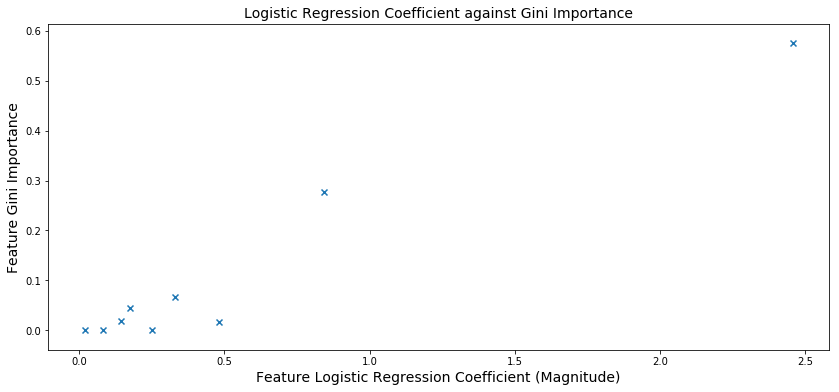

In [142]:
fig, ax = plt.subplots(figsize = (14,6))
plt.scatter(abs(logreg.coef_), gini_importance['Gini importance'], marker = 'x')

ax.set_xlabel('Feature Logistic Regression Coefficient (Magnitude)', fontsize = 14)
ax.set_ylabel('Feature Gini Importance', fontsize = 14)
ax.set_title('Logistic Regression Coefficient against Gini Importance', fontsize = 14)

In [140]:
coef_gini = pd.DataFrame(logreg.coef_[0], index = X_train.columns, columns = ['Log Reg Coef'])
coef_gini['Gini Importance'] = gini_importance['Gini importance']
coef_gini

,Log Reg Coef,Gini Importance
Pclass,-0.844231,0.276294
Sex,2.457091,0.575307
SibSp,-0.480580,0.017251
Parch,-0.143944,0.019019
C,0.251434,0.000000
Q,-0.019037,0.000000
S,0.081724,0.000000
FareBand,0.331096,0.066328
AgeBand,-0.175898,0.045801


**Section 2.4**

**Answers:**

The logistic regression model performed fairly well, achieving a 10-fold train score of about 83.5%, a 10-fold validation (test) score of about 80.7%, and a held-out test score of 76.9%. This is similar (in fact, slightly better) to the performance of the decision tree we trained above. 

We would expect the coefficient _magnitudes_ to correlate with the gini importances of variables. To illustrate this relationship, we plotted a scatter plot of the _absolute value_ of the coefficients (x-axis) against the gini importances (y-axis). As expected, variables with large gini importances (e.g. 'Sex', 'Pclass') have relatively large logistic regression coefficient _magnitudes_, while those with small gini importances have relatively smaller coefficient _magnitudes_. 

### 2.5 Missing Data
Have you been paying close attention to your features? If not, now is a good time to start. Perform analysis that allows you to answer the following questions:
* Do any of your features have missing data? If so, which ones? What percent of observations have missing data?
* What happens to observations with missing data when you run the decision tree and logistic regression models above?
* Use one of the methods we discussed in class to impute missing values
* Rerun your decision tree and logistic regression on the new dataset with imputed missing values. What do you notice?

**Section 2.5**

**Answers:**

The variable 'AgeBand' has 19.9% of its data missing. Up until now, we have simply dropped rows with NaN values (for the AgeBand in particular) before feeding the data into the predictive algorithms. Moreover, recall that we have previously imputed the **2** missing values for 'Embarked' by taking the median value, and dropped the 'Cabin' column which has 687 missing values. 

Now, we will use a more logical approach in imputing the missing data for the AgeBand column. Specifically, we will use the two attributes 'Pclass' and 'Sex' to estimate the AgeBand of passengers. The reasoning is that wealth (for which Pclass can be used as a proxy), together with Gender, are historically indicative of age.

### 2.5.1 Imputing Missing Data

In [146]:
print(qtrain.shape)
print()
print(qtrain.isna().sum())
print()
print('Percentage of observations with missing data:', np.around(qtrain.isna().sum()['Age']/len(qtrain) * 100,2),'%')

(891, 12)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
C             0
Q             0
S             0
FareBand      0
dtype: int64

Percentage of observations with missing data: 19.87 %


In [147]:
guess_ages = np.zeros((2,3), dtype = int)
for i in range(0, 2):
        for j in range(0,3):
            age_guess = qtrain[(qtrain['Sex'] == i) \
                        &(qtrain['Pclass'] == j+1)]['Age'].dropna().median()
    
            guess_ages[i,j] = int(age_guess)
    
for i in range(0, 2):
    for j in range(0, 3):
        qtrain.loc[ (qtrain.Age.isnull()) & (qtrain.Sex == i) \
                & (qtrain.Pclass == j+1),'Age'] = guess_ages[i,j]


qtrain['Age'] = qtrain['Age'].astype(int)

In [148]:
qtrain['AgeBand']=pd.qcut(qtrain['Age'],5,labels=np.arange(5)).astype(int)

qtrain = qtrain.drop(['Age','Fare'], axis = 1)

pd.options.mode.chained_assignment = None
qtrain.loc[qtrain['AgeBand'] < 0, 'AgeBand'] = np.nan # set missing AgeBand values to NaN

qtrain.loc[qtrain['SibSp'] >= 2, 'SibSp'] = 2 
qtrain.loc[qtrain['Parch'] >= 2, 'Parch'] = 2 

In [149]:
print(qtrain.shape)
print()
print(qtrain.isna().sum())
qtrain.head()

(891, 11)

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
C           0
Q           0
S           0
FareBand    0
AgeBand     0
dtype: int64


,Survived,Pclass,Name,Sex,SibSp,Parch,C,Q,S,FareBand,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,0,0,0,1,0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,1,0,0,3,3.0
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,0,1,1,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,0,0,1,3,3.0
4,0,3,"Allen, Mr. William Henry",0,0,0,0,0,1,1,3.0


### 2.5.2 Training Decision Tree with Imputed Data Set

In [152]:
X = qtrain.drop(['Survived','Name'], axis = 1)
y = qtrain['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 99)
print('Shape of training set:', X_train.shape, y_train.shape)
print('Shape of test set:', X_test.shape, y_test.shape)

Shape of training set: (712, 9) (712,)
Shape of test set: (179, 9) (179,)


In [156]:
max_depth = [None,1,2,3,4]
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3,4]
K = 10

kf = KFold(n_splits = K)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
best_score = 0
val_list = []
train_list = []

for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            print('Training for max_depth:', depth, ', min_samples_split:',\
                  split, ', min_samples_leaf:', leaf)
            clf = DecisionTreeClassifier(random_state = 0, max_depth = depth,\
                                            min_samples_split = split,\
                                            min_samples_leaf = leaf)
            
            for train_index, test_index in kf.split(X_train):
                X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                clf.fit(X, y)
                train_list.append(clf.score(X,y))
                val_list.append(clf.score(X_val,y_val))
                
            train_score = np.mean(train_list)
            val_score = np.mean(val_list)
            
        
            print('10-fold CV training score:', train_score)
            print('10-fold CV test score:', val_score)
            print()
            
            if val_score > best_score:
                opt_depth = depth
                opt_split = split
                opt_leaf = leaf
                best_score = val_score

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 1
10-fold CV training score: 0.9051204173166927
10-fold CV test score: 0.7992175273865414

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 2
10-fold CV training score: 0.8889686524960998
10-fold CV test score: 0.8034428794992176

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 3
10-fold CV training score: 0.8810877372594904
10-fold CV test score: 0.8001825769431403

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 4
10-fold CV training score: 0.8746895110179407
10-fold CV test score: 0.8003178794992175

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 1
10-fold CV training score: 0.8787155323712948
10-fold CV test score: 0.8023356807511738

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.8777324249219969
10-fold CV test score: 0.8032244392279604

Training for max_depth

10-fold CV training score: 0.8227465817382695
10-fold CV test score: 0.8000850186589623

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 1
10-fold CV training score: 0.822713745106408
10-fold CV test score: 0.7999627218236042

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.8226734531186802
10-fold CV test score: 0.7998445922448271

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 3
10-fold CV training score: 0.8226289533399518
10-fold CV test score: 0.7996798975672216

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 4
10-fold CV training score: 0.82257489953616
10-fold CV test score: 0.7995210848423877

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 1
10-fold CV training score: 0.8225473791977995
10-fold CV test score: 0.7994172638168191

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 2
10-fold CV training score: 0.82251273434558

In [157]:
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal max_depth: None
Optimal min_samples_split: 2
Optimal min_samples_leaf: 2
Best 10-fold CV test score: 0.7990323422013563


In [159]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = opt_depth,\
                        min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf) 
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('train score:', train_score)
print('Held-out test score:', test_score)

train score: 0.8721910112359551
Held-out test score: 0.7821229050279329


### 2.5.3 Training Logistic Regression with Imputed Data Set

In [160]:
K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 0)

logreg = LogisticRegression(penalty = 'l2', random_state = 0)
for train_index, test_index in kf.split(X_train):
    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
    logreg.fit(X, y)
    train_list.append(logreg.score(X,y))
    val_list.append(logreg.score(X_val,y_val))

print('10-fold train score:', np.mean(train_list))
print('10-fold validation score:', np.mean(val_list))
print('Held-out test score:', logreg.score(X_test, y_test))

10-fold train score: 0.8220702355758165
10-fold validation score: 0.7989420585443444
Held-out test score: 0.7430167597765364


**Section 2.5**

**Answers:**

We expected improvements in the predictive accuracy of the models trained using the imputed data set. In this case, the held-out test score of the decision tree improved significantly from 72.7% to about 78.2%. However, the held-out test score of the logistic regression model decreased slightly from 76.9% to 74.3%. This could be due to small random differences arising from the random selection of data. 

## 2.6 (extra credit): Implement a Decision Tree in Python

Now, put away the canned algorithm from sklearn, and write your own decision tree algorithm. Use the simple recursive algorithm we described in class, and use your algorithm to re-do the analysis in 2.1. Do not worry about implementing bells and whistles. However, you will definitely need the following:
 * A "GrowTree" function that implements the recursive algorithm
 * A function to calculate information gain
 
Implement the minimum required code to build a decision tree. How does your algorithm compare in performance to the sklearn algorithm? What do you think are the main sources of discrepancy? If you had more time, what would you change to improve your algorithm?

In [320]:
# Enter your code here

*Enter your observations here*

## 3: Many Trees

### 3.1: Random Forest
Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict survival on the titanic. Use cross-validation on the training data to choose the best hyper-parameters. 
* What hyperparameters did you select with cross-validation?
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
* How does the RF performance compare to the decision tree and logistic regression?
* Create a plot that shows how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis).

In [166]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [50, 100, 150]
max_depth = [1,2,3,4,None]
min_samples_split = [2,3,4,5]
min_samples_leaf = [1,2,3,4,5]

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 0)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
opt_n_est = np.nan
best_score = 0
val_list = []
train_list = []

for n_est in n_estimators:
    print('Training Random Forest with ', n_est, ' n_estimators...')
    for depth in max_depth:
        print('where max_depth:', depth)
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                
                clf = RandomForestClassifier(n_estimators = n_est, random_state = 0, \
                                                max_depth = depth,\
                                                min_samples_split = split,\
                                                min_samples_leaf = leaf)

                for train_index, test_index in kf.split(X_train):
                    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                    clf.fit(X, y)
                    train_list.append(clf.score(X,y))
                    val_list.append(clf.score(X_val,y_val))

                train_score = np.mean(train_list)
                val_score = np.mean(val_list)


                #print('10-fold CV training score:', train_score)
                #print('10-fold CV test score:', val_score)
                #print()

                if val_score > best_score:
                    opt_depth = depth
                    opt_split = split
                    opt_leaf = leaf
                    opt_n_est = n_est
                    best_score = val_score

Training Random Forest with  50  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: None
Training Random Forest with  100  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: None
Training Random Forest with  150  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: None


In [167]:
print('Optimal parameters for Random Forest Classifier:')
print('Optimal n_estimators:', opt_n_est)
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal parameters for Random Forest Classifier:
Optimal n_estimators: 150
Optimal max_depth: None
Optimal min_samples_split: 5
Optimal min_samples_leaf: 5
Best 10-fold CV test score: 0.7935813119457485


In [169]:
rf = RandomForestClassifier(n_estimators = opt_n_est,\
                            max_depth = opt_depth,\
                            min_samples_split = opt_split,\
                            min_samples_leaf = opt_leaf,\
                            random_state = 0) 
rf.fit(X_train, y_train)
train_score = np.mean(rf.score(X_train, y_train))
test_score = np.mean(rf.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)

Train score: 0.8455056179775281
Held-out test score: 0.8044692737430168


**Section 3.1**

**Answers:**

The hyperparameters we optimized with cross-validation are: n_estimators, max_depth, min_samples_split, and min_samples_leaf. The combination which achieved the highest 10-fold cross-validation test score of about 79.4% is n_estimators = 150, max_depth = None, min_samples_split = 5, min_samples_leaf = 5. 

The cross-validation performance of 79.4% is very similar to the held-out test score of 80.4%, which suggests that it is a good indicator of test accuracy (unseen data). The held-out test score of the random forest classifier surpasses to the performances of both the decision tree and logistic regression, which achieved held-out test scores of 78.2% and 74.3% respectively. 

To show how cross-validated performance relates to the number of trees, we train the random forest classifier with different  values of n_estimators and default values for other parameters. 

In [176]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [1,5,10,30,50,70,90,110,130,150,170,190,210,230,250]

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 0)

val_list = []
train_list = []
val_score = []
train_score = []

for n_est in n_estimators:
    print('Training random forest with ', n_est, ' estimators...')
    clf = RandomForestClassifier(n_estimators = n_est, random_state = 0)

    for train_index, test_index in kf.split(X_train):
        X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
        y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
        clf.fit(X, y)
        train_list.append(clf.score(X,y))
        val_list.append(clf.score(X_val,y_val))

    train_score.append(np.mean(train_list))
    val_score.append(np.mean(val_list))

Training random forest with  1  estimators...
Training random forest with  5  estimators...
Training random forest with  10  estimators...
Training random forest with  30  estimators...
Training random forest with  50  estimators...
Training random forest with  70  estimators...
Training random forest with  90  estimators...
Training random forest with  110  estimators...
Training random forest with  130  estimators...
Training random forest with  150  estimators...
Training random forest with  170  estimators...
Training random forest with  190  estimators...
Training random forest with  210  estimators...
Training random forest with  230  estimators...
Training random forest with  250  estimators...


Text(0.5,1,'Cross-Validation Accuracy against Number of Trees')

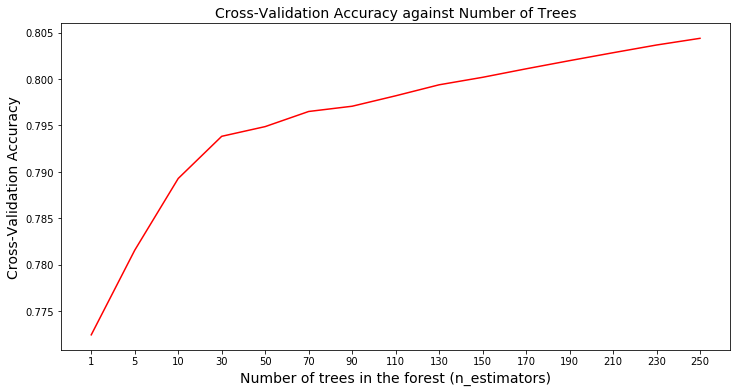

In [177]:
fig, ax = plt.subplots(figsize = (12,6))
plt.plot(val_score, color = 'red')

x = [i for i in range(len(n_estimators))]
plt.xticks(x, n_estimators)
ax.set_xlabel('Number of trees in the forest (n_estimators)', fontsize = 14)
ax.set_ylabel('Cross-Validation Accuracy', fontsize = 14)
ax.set_title('Cross-Validation Accuracy against Number of Trees', fontsize = 14)

**Section 3.1**

**Answers:**

The graph clearly shows that as you increase the number of trees in the forest, there is a general increase in cross-validation accuracy of the random forest classifier. It should be noted that when the number of estimators increase beyond approximately 30, the increase in cross-validation accuracy starts to decrease. The fact that cross-validation accuracy does not decrease significantly when we increase the number of estimators substantially beyond this point shows the robustness of the random forest classifier against overfitting. 

### 3.2: Gradient Boosting

Use the [Gradient Boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict survival on the Titanic. Tune your hyperparameters. 
* How does the GBM performance compare to the other models?
* Create a figure showing the feature importances in your final model (with properly tuned hyperparameters)


In [178]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [50,100,150]
max_depth = [1,2,3,4,5, None]
min_samples_split = [2,3,4,5]
min_samples_leaf = [1,2,3,4,5]

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 0)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
opt_n_est = np.nan
best_score = 0
val_list = []
train_list = []

for n_est in n_estimators:
    print('Training Gradient Boosting Classifier with ', n_est, ' n_estimators...')
    for depth in max_depth:
        print('where max_depth:', depth)
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                
                clf = GradientBoostingClassifier(n_estimators = n_est, random_state = 0, \
                                                max_depth = depth,\
                                                min_samples_split = split,\
                                                min_samples_leaf = leaf)

                for train_index, test_index in kf.split(X_train):
                    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                    clf.fit(X, y)
                    train_list.append(clf.score(X,y))
                    val_list.append(clf.score(X_val,y_val))

                train_score = np.mean(train_list)
                val_score = np.mean(val_list)


                #print('10-fold CV training score:', train_score)
                #print('10-fold CV test score:', val_score)
                #print()

                if val_score > best_score:
                    opt_depth = depth
                    opt_split = split
                    opt_leaf = leaf
                    opt_n_est = n_est
                    best_score = val_score

Training Gradient Boosting Classifier with  50  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: 5
where max_depth: None
Training Gradient Boosting Classifier with  100  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: 5
where max_depth: None
Training Gradient Boosting Classifier with  150  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: 5
where max_depth: None


In [179]:
print('Optimal parameters for Gradient Boosting Classifier:')
print('Optimal n_estimators:', opt_n_est)
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal parameters for Gradient Boosting Classifier:
Optimal n_estimators: 150
Optimal max_depth: 5
Optimal min_samples_split: 5
Optimal min_samples_leaf: 5
Best 10-fold CV test score: 0.809002673448096


In [180]:
gbc = GradientBoostingClassifier(n_estimators = opt_n_est, random_state = 0, max_depth = opt_depth,\
                        min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf) 
gbc.fit(X_train, y_train)
train_score = np.mean(gbc.score(X_train, y_train))
test_score = np.mean(gbc.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)

Train score: 0.9030898876404494
Held-out test score: 0.8044692737430168


Text(0,0.5,'Feature Importance')

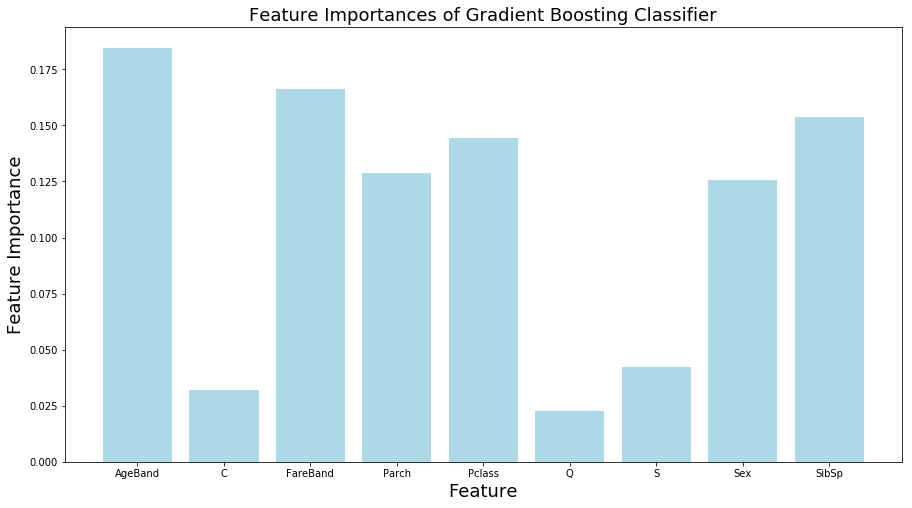

In [186]:
gbc_features = pd.DataFrame(gbc.feature_importances_, index = X_train.columns, columns = ['GBC features'])

plt.figure(figsize = (15,8))
plt.bar(gbc_features.index, gbc_features['GBC features'], color = 'lightblue')
plt.title('Feature Importances of Gradient Boosting Classifier', fontsize = 18)
plt.xlabel('Feature', fontsize = 18)
plt.ylabel('Feature Importance', fontsize = 18)

**Section 3.2**

**Answers:**

Here, we trained the Gradient Boosting Classifier with differnent values of n_estimators, max_depth, min_samples_split, and min_samples_leaf. The combination which achieved the best cross-validation score of 80.9% is n_estimators = 150, max_depth = 5, min_samples_split = 5, min_samples_leaf = 5. 

The held-out test score of the Gradient Boosting Classifier is 80.4%, which is the same as the held-out test score of the Random Forest Classifier trained previously. The Gradient Boosting Classifier did better than both the Decision Tree and Logistic Regression models. 

When plotting the feature importances of the Gradient Boosting Classifier, we note the differences compared to the Gini importances of the Decision Tree. In this case, 'AgeBand','FareBand','Parch','Pclass' and 'SibSp' are deemed to be more important than 'Sex'. This is different from the Gini importances of the Decision Tree, which recognises 'Sex' and 'Pclass' as the two most important variables in predicting survivability. 


### 3.3 Feature Engineering
Revisit the features in your dataset.
* Are each of the features being appropriately included in the analysis? 
* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
* Create a final table that summarizes the performance of your models as follows:

| Model | Cross-validated Performance   | Test Performance | 
|------|------|------|
|   Decision Tree        |  |  |
|   Decision Tree (with imputed missing values and new features)        |  |  |
|   Logistic Regression  |  |  |
|   Logistic Regression (with imputed missing values and new features)        |  |  |
|   Random Forest        |  |  |
|   Random Forest (with imputed missing values and new features)        |  |  |
|   Gradient Boosting    |  |  | 
|   Gradient Boosting (with imputed missing values and new features)        |  |   x |


**Section 3.3**

**Answers:**

So far, we have transformed features (with 'Name' dropped) into the appropriate form before feeding them into the machine learning algorithm. However, it is possible to engineer a new feature named 'Title' (e.g. Mr, Mrs, Master) from the 'Name' column. We will use the one-hot encoding approach to create this variable.

Note that other variables such as 'Age' was categorized into 5 categories (in 'AgeBand') in the range [0,1,2,3,4] instead of using the one-hot encoding approach because there is an _inherent order_ to these variables. For our case, it would not make sense, for instance, to classify 'Mr' as 0, 'Mrs' as 1, 'Master' as 2, etc if we were to use this approach for categorizing the variable 'Title'.

We also note that 77.1% of the 'Cabin' data is missing, which makes it sensible for us to exclude it (and any feature engineered from it) from the predictive model. 

Instead, we will engineer a new feature 'Age \* Pclass', which is constructed from multiplying the 'AgeBand' and 'Pclass'. 

In [192]:
qtrain['Age*Pclass'] = qtrain['AgeBand'] * qtrain['Pclass']

In [193]:
qtrain.groupby('Age*Pclass').mean()['Survived']

Age*Pclass
0.0     0.455556
1.0     0.761905
2.0     0.510204
3.0     0.347368
4.0     0.474576
6.0     0.339806
8.0     0.382353
9.0     0.206349
12.0    0.078947
Name: Survived, dtype: float64

**Next, we extract the 'Title' variable from 'Name'**

In [196]:
qtrain['Title'] = qtrain['Name'].str.extract(' ([A-Za-z]+)\.',\
                                                expand=False)
qtrain['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

**Here, we simplify the types of 'Title' available**

In [197]:
qtrain['Title'] = qtrain['Title'].\
                  replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') # classify as 'Rare' title type

qtrain['Title'] = qtrain['Title'].replace('Mlle', 'Miss') # Mademoiselle
qtrain['Title'] = qtrain['Title'].replace('Ms', 'Miss')
qtrain['Title'] = qtrain['Title'].replace('Mme', 'Mrs') # Madame

In [203]:
qtrain.drop('Name',axis =1, inplace = True)
qtrain.head()

,Survived,Pclass,Sex,SibSp,Parch,C,Q,S,FareBand,AgeBand,Age*Pclass,Title
0,0,3,0,1,0,0,0,1,0,1.0,3.0,Mr
1,1,1,1,1,0,1,0,0,3,3.0,3.0,Mrs
2,1,3,1,0,0,0,0,1,1,2.0,6.0,Miss
3,1,1,1,1,0,0,0,1,3,3.0,3.0,Mrs
4,0,3,0,0,0,0,0,1,1,3.0,9.0,Mr


In [204]:
pd.DataFrame(qtrain.groupby('Title').mean()['Survived'])

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


**Answers:**

As seen above, within male passengers, those with the Title 'Master' had a better chance of survival compared to those with the Title 'Mr'. This indicates that 'Title' might be a good indicator of survivability. 

Next, we map the variable 'Title' to dummy binary variables.

In [206]:
binary_encoded = pd.get_dummies(qtrain.Title)
newcols = binary_encoded.columns
qtrain[newcols] = binary_encoded
qtrain.drop('Title', axis = 1, inplace = True)
qtrain.head()

,Survived,Pclass,Sex,SibSp,Parch,C,Q,S,FareBand,AgeBand,Age*Pclass,Master,Miss,Mr,Mrs,Rare
0,0,3,0,1,0,0,0,1,0,1.0,3.0,0,0,1,0,0
1,1,1,1,1,0,1,0,0,3,3.0,3.0,0,0,0,1,0
2,1,3,1,0,0,0,0,1,1,2.0,6.0,0,1,0,0,0
3,1,1,1,1,0,0,0,1,3,3.0,3.0,0,0,0,1,0
4,0,3,0,0,0,0,0,1,1,3.0,9.0,0,0,1,0,0


In [207]:
X = qtrain.drop('Survived', axis = 1)
y = qtrain['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 99)
print('Shape of training set (with imputed values and new features):', X_train.shape, y_train.shape)
print('Shape of test set (with imputed values and new features):', X_test.shape, y_test.shape)

Shape of training set (with imputed values and new features): (712, 15) (712,)
Shape of test set (with imputed values and new features): (179, 15) (179,)


### Decision Tree (with imputed missing values and new features)

In [208]:
max_depth = [None,1,2,3,4]
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3,4]
K = 10

kf = KFold(n_splits = K)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
best_score = 0
val_list = []
train_list = []

for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            print('Training for max_depth:', depth, ', min_samples_split:',\
                  split, ', min_samples_leaf:', leaf)
            clf = DecisionTreeClassifier(random_state = 0, max_depth = depth,\
                                            min_samples_split = split,\
                                            min_samples_leaf = leaf)
            
            for train_index, test_index in kf.split(X_train):
                X_cv, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                y_cv, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                clf.fit(X_cv, y_cv)
                train_list.append(clf.score(X_cv,y_cv))
                val_list.append(clf.score(X_val,y_val))
                
            train_score = np.mean(train_list)
            val_score = np.mean(val_list)
            
        
            print('10-fold CV training score:', train_score)
            print('10-fold CV test score:', val_score)
            print()
            
            if val_score > best_score:
                opt_depth = depth
                opt_split = split
                opt_leaf = leaf
                best_score = val_score

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 1
10-fold CV training score: 0.9093335608424337
10-fold CV test score: 0.7950508607198749

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 2
10-fold CV training score: 0.8931820397815912
10-fold CV test score: 0.7957355242566511

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 3
10-fold CV training score: 0.8857171411856473
10-fold CV test score: 0.7959441836202399

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 4
10-fold CV training score: 0.8796049263845553
10-fold CV test score: 0.7971097417840375

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 1
10-fold CV training score: 0.8839590483619345
10-fold CV test score: 0.7961424100156493

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.8828042934217368
10-fold CV test score: 0.7961887063119458

Training for max_depth

10-fold CV training score: 0.8273328650191463
10-fold CV test score: 0.8021742068573056

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 4
10-fold CV training score: 0.8275180643386449
10-fold CV test score: 0.8023977196512407

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 1
10-fold CV training score: 0.8277378197101568
10-fold CV test score: 0.8027118853471708

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 2
10-fold CV training score: 0.8279473075474743
10-fold CV test score: 0.803015217743241

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 3
10-fold CV training score: 0.8281364732343531
10-fold CV test score: 0.80321277950187

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 4
10-fold CV training score: 0.8282959324622986
10-fold CV test score: 0.8034040818988002



In [209]:
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal max_depth: 4
Optimal min_samples_split: 4
Optimal min_samples_leaf: 4
Best 10-fold CV test score: 0.8034040818988002


In [210]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = None,\
                        min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf) 
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)

Train score: 0.8623595505617978
Held-out test score: 0.8379888268156425


### Logistic Regression (with imputed missing values and new features)

In [211]:
from sklearn.linear_model import LogisticRegression

K = 10
kf = KFold(n_splits = K)

logreg = LogisticRegression(penalty = 'l2', random_state = 0)
for train_index, test_index in kf.split(X_train):
    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
    logreg.fit(X, y)
    train_list.append(logreg.score(X,y))
    val_list.append(logreg.score(X_val,y_val))

print('10-fold train score:', np.mean(train_list))
print('10-fold validation score:', np.mean(val_list))
print('Held-out test score:', logreg.score(X_test, y_test))

10-fold train score: 0.8283682962072582
10-fold validation score: 0.8037279689063342
Held-out test score: 0.7877094972067039


### Random Forest (with imputed missing values and new features)

In [212]:
n_estimators = [50, 100, 150]
max_depth = [1,2,3,4,None]
min_samples_split = [2,3,4,5]
min_samples_leaf = [1,2,3,4,5]

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 0)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
opt_n_est = np.nan
best_score = 0
val_list = []
train_list = []

for n_est in n_estimators:
    print('Training Random Forest with ', n_est, ' n_estimators...')
    for depth in max_depth:
        print('where max_depth:', depth)
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                
                clf = RandomForestClassifier(n_estimators = n_est, random_state = 0, \
                                                max_depth = depth,\
                                                min_samples_split = split,\
                                                min_samples_leaf = leaf)

                for train_index, test_index in kf.split(X_train):
                    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                    clf.fit(X, y)
                    train_list.append(clf.score(X,y))
                    val_list.append(clf.score(X_val,y_val))

                train_score = np.mean(train_list)
                val_score = np.mean(val_list)


                #print('10-fold CV training score:', train_score)
                #print('10-fold CV test score:', val_score)
                #print()

                if val_score > best_score:
                    opt_depth = depth
                    opt_split = split
                    opt_leaf = leaf
                    opt_n_est = n_est
                    best_score = val_score

Training Random Forest with  50  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: None
Training Random Forest with  100  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: None
Training Random Forest with  150  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: None


In [214]:
print('Optimal parameters for Random Forest Classifier:')
print('Optimal n_estimators:', opt_n_est)
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal parameters for Random Forest Classifier:
Optimal n_estimators: 150
Optimal max_depth: None
Optimal min_samples_split: 5
Optimal min_samples_leaf: 5
Best 10-fold CV test score: 0.8111654277516954


In [213]:
rf = RandomForestClassifier(n_estimators = opt_n_est,\
                            max_depth = opt_depth,\
                            min_samples_split = opt_split,\
                            min_samples_leaf = opt_leaf,\
                            random_state = 0) 
rf.fit(X_train, y_train)
train_score = np.mean(rf.score(X_train, y_train))
test_score = np.mean(rf.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)

Train score: 0.8553370786516854
Held-out test score: 0.8100558659217877


### Gradient Boosting (with imputed missing values and new features)

In [215]:
n_estimators = [50,100,150]
max_depth = [1,2,3,4,5, None]
min_samples_split = [2,3,4,5]
min_samples_leaf = [1,2,3,4,5]

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 0)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
opt_n_est = np.nan
best_score = 0
val_list = []
train_list = []

for n_est in n_estimators:
    print('Training Gradient Boosting Classifier with ', n_est, ' n_estimators...')
    for depth in max_depth:
        print('where max_depth:', depth)
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                
                clf = GradientBoostingClassifier(n_estimators = n_est, random_state = 0, \
                                                max_depth = depth,\
                                                min_samples_split = split,\
                                                min_samples_leaf = leaf)

                for train_index, test_index in kf.split(X_train):
                    X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                    y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                    clf.fit(X, y)
                    train_list.append(clf.score(X,y))
                    val_list.append(clf.score(X_val,y_val))

                train_score = np.mean(train_list)
                val_score = np.mean(val_list)


                #print('10-fold CV training score:', train_score)
                #print('10-fold CV test score:', val_score)
                #print()

                if val_score > best_score:
                    opt_depth = depth
                    opt_split = split
                    opt_leaf = leaf
                    opt_n_est = n_est
                    best_score = val_score

Training Gradient Boosting Classifier with  50  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: 5
where max_depth: None
Training Gradient Boosting Classifier with  100  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: 5
where max_depth: None
Training Gradient Boosting Classifier with  150  n_estimators...
where max_depth: 1
where max_depth: 2
where max_depth: 3
where max_depth: 4
where max_depth: 5
where max_depth: None


In [216]:
print('Optimal parameters for Gradient Boosting Classifier:')
print('Optimal n_estimators:', opt_n_est)
print('Optimal max_depth:', opt_depth)
print('Optimal min_samples_split:', opt_split)
print('Optimal min_samples_leaf:', opt_leaf)
print('Best 10-fold CV test score:', val_score)

Optimal parameters for Gradient Boosting Classifier:
Optimal n_estimators: 50
Optimal max_depth: 4
Optimal min_samples_split: 2
Optimal min_samples_leaf: 1
Best 10-fold CV test score: 0.8162902647365675


In [217]:
gbc = GradientBoostingClassifier(n_estimators = opt_n_est, random_state = 0, max_depth = opt_depth,\
                        min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf) 
gbc.fit(X_train, y_train)
train_score = np.mean(gbc.score(X_train, y_train))
test_score = np.mean(gbc.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)

Train score: 0.8764044943820225
Held-out test score: 0.8156424581005587


In [222]:
Model = ['Decision Tree', 'Decision Tree (with imputed missing values and new features)',\
         'LogisticRegression','Logistic Regression (with imputed missing values and new features)',\
         'Random Forest','Random Forest (with imputed missing values and new features)',\
         'Gradient Boosting', 'Gradient Boosting (with imputed missing values and new features)']

scores = np.asarray([80.35, 72.72, 86.2, 83.8, 80.7, 76.9, 80.4, 78.8, 79.4, 80.4, 85.5, 81.0, 80.9, 80.4, 81.6, 81.6]).reshape(8,2)
summary = pd.DataFrame(scores, index = Model, columns = ['Cross-validated Performance (%)','Test Performance (%)'])
summary

,Cross-validated Performance (%),Test Performance (%)
Decision Tree,80.35,72.72
Decision Tree (with imputed missing values and new features),86.20,83.80
LogisticRegression,80.70,76.90
Logistic Regression (with imputed missing values and new features),80.40,78.80
Random Forest,79.40,80.40
Random Forest (with imputed missing values and new features),85.50,81.00
Gradient Boosting,80.90,80.40
Gradient Boosting (with imputed missing values and new features),81.60,81.60


**Section 3.3**

**Answers:**

The cross-validation and test scores for each model (with and without imputed data and new features) are summarized above. It is noted that the test performances of models which use decision trees are better than that of Logistic Regression's. 

Also, it is noted that training models with imputed missing values and new features does _increase_ both cross-validated and test scores. 

We also note that the best performing model is the simple Decision Tree, which yielded the highest test score of 83.8%, with both Random Forest and Gradient Boosting following closely behind with 81.00% and 81.60% respectively. Initially, we would expect the Random Forest and Gradient Boosting models to perform slightly better than the simple Decision Tree due to the added randomness introduced by these models. This result can perhaps be attributed to the fact that both cross-validation and test scores are affected by how data is shuffled to a certain extent. Indeed, running the models with different values of 'random_state' yields slightly different test scores. 

As such, it might be misleading to conclude that the simple Decision Tree is the best model for this purpose. Instead, it would be more appropriate to conclude that all 3 tree-based models yield similar test accuracies of about 81.0%-83.0%. 